<a href="https://colab.research.google.com/github/roggersanguzu/Corona-Virus-Prediction/blob/main/Predict_the_chances_of_catching_corona_virus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This part involves importing all the necessary Libraries needed for this model**

In [1]:
import matplotlib.pyplot as plt
import matplotlib as matplotlib
import seaborn as sns
import plotly.express as px
import numpy as np
import pandas as pd
%matplotlib inline

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve, average_precision_score
from sklearn.calibration import calibration_curve
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully")

Libraries imported successfully


**Importing the dataset that is needed for training the model**

In [2]:
from google.colab import drive
drive.mount('/content/drive')
file_path="/content/drive/MyDrive/Colab Notebooks/Datasets/coronavirusdataset.csv"
corona_df=pd.read_csv(file_path)
corona_df

Mounted at /content/drive


,batch_date,test_name,swab_type,covid19_test_results,age,high_risk_exposure_occupation,high_risk_interactions,diabetes,chd,htn,...,headache,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat,cxr_findings,cxr_impression,cxr_label,cxr_link
0,2020-10-20,"SARS-CoV-2, NAA",Nasal,Negative,39,False,NaN,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
1,2020-10-20,COVID-19 PCR External Result,Nasal,Negative,56,False,NaN,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
2,2020-10-20,Rapid COVID-19 PCR Test,Nasal,Negative,35,False,NaN,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
3,2020-10-20,Rapid COVID-19 PCR Test,Nasal,Negative,37,False,NaN,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
4,2020-10-20,Rapid COVID-19 PCR Test,Nasal,Negative,42,False,NaN,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7289,2020-10-20,COVID-19 PCR External Result,Nasal,Negative,26,False,NaN,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
7290,2020-10-20,"SARS-CoV-2, NAA",Nasal,Negative,29,False,False,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
7291,2020-10-20,"SARS-CoV-2, NAA",Nasal,Negative,33,False,NaN,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
7292,2020-10-20,Rapid COVID-19 PCR Test,Nasal,Negative,46,False,False,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN


In [ ]:
corona_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7294 entries, 0 to 7293
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   batch_date                     7294 non-null   object 
 1   test_name                      7294 non-null   object 
 2   swab_type                      7294 non-null   object 
 3   covid19_test_results           7294 non-null   object 
 4   age                            7294 non-null   int64  
 5   high_risk_exposure_occupation  7294 non-null   bool   
 6   high_risk_interactions         2727 non-null   object 
 7   diabetes                       7294 non-null   bool   
 8   chd                            7294 non-null   bool   
 9   htn                            7294 non-null   bool   
 10  cancer                         7294 non-null   bool   
 11  asthma                         7294 non-null   bool   
 12  copd                           7294 non-null   b

In [ ]:
corona_df.describe()

,age,temperature,pulse,sys,dia,rr,sats,days_since_symptom_onset
count,7294.000000,1869.000000,1866.000000,1727.000000,1727.000000,1544.000000,1869.000000,591.000000
mean,39.717576,36.801525,77.221865,121.608570,77.406485,14.526554,98.174960,4.974619
std,14.014773,0.279825,12.945258,15.623307,9.297785,1.963522,1.335119,15.628018
min,0.000000,35.650000,37.000000,50.000000,15.000000,4.000000,92.000000,1.000000
25%,30.000000,36.650000,68.000000,111.000000,71.000000,13.000000,97.000000,2.000000
50%,38.000000,36.800000,77.000000,120.000000,77.000000,14.000000,98.000000,2.000000
75%,50.000000,37.000000,85.000000,130.000000,83.000000,16.000000,99.000000,4.000000
max,87.000000,38.400000,133.000000,210.000000,125.000000,24.000000,100.000000,300.000000


In [ ]:
sns.set_style("darkgrid")
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,5)

**understanding whether those who contracted the disease are more than those who never contracted the virus**

/tmp/ipython-input-3235659977.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='covid19_test_results', data=corona_df, palette='coolwarm')


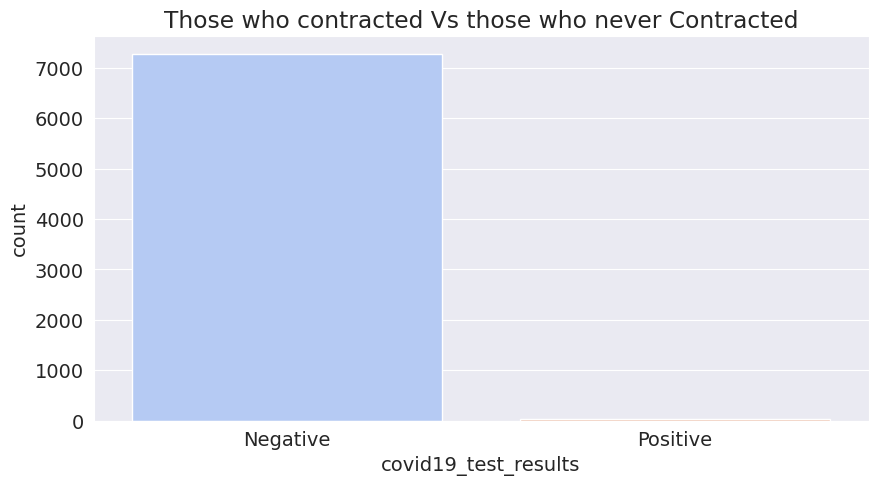

In [ ]:
sns.countplot(x='covid19_test_results', data=corona_df, palette='coolwarm')
plt.title('Those who contracted Vs those who never Contracted')
plt.show()

**relationship between temperature Vs Covid results**

In [ ]:
fig = px.histogram(corona_df, x='temperature', color='covid19_test_results', nbins=50, title='Temp Vs Covid +ve',color_discrete_map={'positive':'green','negative':'red'})
fig.update_layout(bargap=0.1)
fig.show()

**relationship between sorethroat Vs Possibility of getting Corona**

In [ ]:
fig = px.histogram(corona_df, x='sore_throat', color='covid19_test_results', nbins=50, title='Temp Vs Covid +ve')
fig.show()

Association between runny Nose and the possibility of catching Corona

In [ ]:
fig = px.histogram(corona_df, x='runny_nose', color='covid19_test_results', nbins=50, title='Runny Nose Vs Covid +ve',color_discrete_map={'positive':'green','negative':'red'})
fig.update_layout(bargap=0.1)
fig.show()


**Define Target Variable and Now 1 = positive, 0 = negative/other**

In [6]:
corona_df['target'] = corona_df['covid19_test_results'].astype(str).str.lower().apply(lambda x: 1 if 'positive' in x else 0)
print("Target distribution:\n", corona_df['target'].value_counts())


Target distribution:
 target
0    7269
1      25
Name: count, dtype: int64


In [7]:
corona_df

,batch_date,test_name,swab_type,covid19_test_results,age,high_risk_exposure_occupation,high_risk_interactions,diabetes,chd,htn,...,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat,cxr_findings,cxr_impression,cxr_label,cxr_link,target
0,2020-10-20,"SARS-CoV-2, NAA",Nasal,Negative,39,False,NaN,False,False,False,...,False,False,False,False,False,NaN,NaN,NaN,NaN,0
1,2020-10-20,COVID-19 PCR External Result,Nasal,Negative,56,False,NaN,False,False,False,...,False,False,False,False,False,NaN,NaN,NaN,NaN,0
2,2020-10-20,Rapid COVID-19 PCR Test,Nasal,Negative,35,False,NaN,False,False,False,...,False,False,False,False,False,NaN,NaN,NaN,NaN,0
3,2020-10-20,Rapid COVID-19 PCR Test,Nasal,Negative,37,False,NaN,False,False,False,...,False,False,False,False,False,NaN,NaN,NaN,NaN,0
4,2020-10-20,Rapid COVID-19 PCR Test,Nasal,Negative,42,False,NaN,False,False,False,...,False,False,False,False,False,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7289,2020-10-20,COVID-19 PCR External Result,Nasal,Negative,26,False,NaN,False,False,False,...,False,False,False,False,False,NaN,NaN,NaN,NaN,0
7290,2020-10-20,"SARS-CoV-2, NAA",Nasal,Negative,29,False,False,False,False,False,...,False,False,False,False,False,NaN,NaN,NaN,NaN,0
7291,2020-10-20,"SARS-CoV-2, NAA",Nasal,Negative,33,False,NaN,False,False,False,...,False,False,False,False,False,NaN,NaN,NaN,NaN,0
7292,2020-10-20,Rapid COVID-19 PCR Test,Nasal,Negative,46,False,False,False,False,False,...,False,False,False,False,False,NaN,NaN,NaN,NaN,0


**Feature Selection**

Exclude irrelevant columns (IDs, links, mostly-empty columns) and separate numeric vs categorical

In [8]:
exclude_cols = ['batch_date','test_name','covid19_test_results','cxr_link','cxr_findings','cxr_impression','cxr_label','target']
features = [c for c in corona_df.columns if c not in exclude_cols and corona_df[c].notna().sum() > 10]


In [15]:
numeric_feats = corona_df[features].select_dtypes(include=['int64','float64']).columns.tolist()
categorical_feats = corona_df[features].select_dtypes(include=['object','bool']).columns.tolist()

print("Numeric features:", numeric_feats)
print("Categorical features:", categorical_feats)


Numeric features: ['age', 'temperature', 'pulse', 'sys', 'dia', 'rr', 'sats', 'days_since_symptom_onset']
Categorical features: ['swab_type', 'high_risk_exposure_occupation', 'high_risk_interactions', 'diabetes', 'chd', 'htn', 'cancer', 'asthma', 'copd', 'autoimmune_dis', 'smoker', 'rapid_strep_results', 'ctab', 'labored_respiration', 'rhonchi', 'wheezes', 'cough', 'cough_severity', 'fever', 'sob', 'sob_severity', 'diarrhea', 'fatigue', 'headache', 'loss_of_smell', 'loss_of_taste', 'runny_nose', 'muscle_sore', 'sore_throat']


**Train/Test Split**

In [17]:
X = corona_df[features]
y = corona_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (5470, 37) Test shape: (1824, 37)


**Preprocessing Pipelines**

In [18]:

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])


preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_feats),
    ('cat', categorical_transformer, categorical_feats)
])


**Casting categorical columns to string**

In [19]:
for col in categorical_feats:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)


**Casting numeric columns to float**

In [20]:
for col in numeric_feats:
    X_train[col] = pd.to_numeric(X_train[col], errors='coerce')
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce')


**Defining Models and hyperparameter grids**

In [21]:
models = {
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42, n_jobs=-1),
    'GradientBoosting': GradientBoostingClassifier(random_state=42)
}

param_grids = {
    'DecisionTree': {'clf__max_depth': [3,5,8,12], 'clf__min_samples_split':[2,10,20]},
    'RandomForest': {'clf__n_estimators':[100,200], 'clf__max_depth':[5,10,None], 'clf__max_features':['sqrt','log2']},
    'GradientBoosting': {'clf__n_estimators':[100,200], 'clf__learning_rate':[0.01,0.1], 'clf__max_depth':[3,5]}
}

best_estimators = {}

for name, model in models.items():
    print(f"\n--- Grid Search for {name} ---")

    pipeline = Pipeline(steps=[('pre', preprocessor), ('clf', model)])
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    grid = GridSearchCV(pipeline, param_grids[name], cv=cv, scoring='roc_auc', n_jobs=-1, verbose=1)

    grid.fit(X_train, y_train)

    print("Best params:", grid.best_params_)
    print("Best CV ROC AUC:", grid.best_score_)
    best_estimators[name] = grid.best_estimator_


--- Grid Search for DecisionTree ---
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best params: {'clf__max_depth': 5, 'clf__min_samples_split': 10}
Best CV ROC AUC: 0.6449086212744249

--- Grid Search for RandomForest ---
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best params: {'clf__max_depth': 5, 'clf__max_features': 'sqrt', 'clf__n_estimators': 100}
Best CV ROC AUC: 0.8180120221887728

--- Grid Search for GradientBoosting ---
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best params: {'clf__learning_rate': 0.01, 'clf__max_depth': 3, 'clf__n_estimators': 200}
Best CV ROC AUC: 0.7410432941750267


**Running Grid Search for Each Model**

In [22]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline

best_estimators = {}

for name, model in models.items():
    print(f"\n--- Grid Search for {name} ---")

    pipeline = Pipeline(steps=[('pre', preprocessor), ('clf', model)])

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    grid = GridSearchCV(pipeline, param_grids[name], cv=cv, scoring='roc_auc', n_jobs=-1, verbose=1)

    grid.fit(X_train, y_train)

    print("Best params:", grid.best_params_)
    print("Best CV ROC AUC:", grid.best_score_)
    best_estimators[name] = grid.best_estimator_



--- Grid Search for DecisionTree ---
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best params: {'clf__max_depth': 5, 'clf__min_samples_split': 10}
Best CV ROC AUC: 0.6449086212744249

--- Grid Search for RandomForest ---
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best params: {'clf__max_depth': 5, 'clf__max_features': 'sqrt', 'clf__n_estimators': 100}
Best CV ROC AUC: 0.8180120221887728

--- Grid Search for GradientBoosting ---
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best params: {'clf__learning_rate': 0.01, 'clf__max_depth': 3, 'clf__n_estimators': 200}
Best CV ROC AUC: 0.7410432941750267
